## 1. Load Data

## 1.1 Load Restaurants

In [1]:
import wrangling as wr
restaurants = wr.load_file('RCdata/geoplaces2.csv', 'placeID')
print('{} restaurants loaded'.format(len(restaurants)))

130 restaurants loaded


In [2]:
wr.show_random(restaurants)

('135073', {'placeID': '135073', 'latitude': '22.147175', 'longitude': '-100.974269', 'the_geom_meter': '0101000020957F0000D010A853D34858C116A1EA51CAA24B41', 'name': 'Restaurante Bar El Gallinero', 'address': 'Pascual M. Hernandez 210 Centro', 'city': 'San Luis Potosi', 'state': 'SLP', 'country': 'Mexico', 'fax': '?', 'zip': '78000', 'alcohol': 'Wine-Beer', 'smoking_area': 'section', 'dress_code': 'informal', 'accessibility': 'no_accessibility', 'price': 'high', 'url': '?', 'Rambience': 'familiar', 'franchise': 'f', 'area': 'closed', 'other_services': 'none'})


In [3]:
restaurants = wr.add_file_content('RCdata/chefmozaccepts.csv', 'placeID', restaurants, 'Rpayment')
restaurants = wr.add_file_content('RCdata/chefmozcuisine.csv', 'placeID', restaurants, 'Rcuisine')
restaurants = wr.add_file_content('RCdata/chefmozparking.csv', 'placeID', restaurants, 'parking_lot')
restaurants = wr.add_file_content('RCdata/chefmozhours4.csv', 'placeID', restaurants, 'hours')
restaurants = wr.add_file_content('RCdata/chefmozhours4.csv', 'placeID', restaurants, 'days')

Added 253 fields (1061 IDs not found).
Added 112 fields (804 IDs not found).
Added 130 fields (572 IDs not found).
Added 384 fields (1955 IDs not found).
Added 384 fields (1955 IDs not found).


In [4]:
wr.show_random(restaurants)

('135034', {'placeID': '135034', 'latitude': '22.140517', 'longitude': '-101.021422', 'the_geom_meter': '0101000020957F000026D92BB4894858C161A7552DA2B04B41', 'name': 'Michiko Restaurant Japones', 'address': 'Cordillera de Los Alpes 160 Lomas 2 Seccion', 'city': 'San Luis Potosi', 'state': 'SLP', 'country': 'Mexico', 'fax': '?', 'zip': '78210', 'alcohol': 'No_Alcohol_Served', 'smoking_area': 'none', 'dress_code': 'informal', 'accessibility': 'no_accessibility', 'price': 'medium', 'url': '?', 'Rambience': 'familiar', 'franchise': 'f', 'area': 'closed', 'other_services': 'none', 'Rpayment': ' cash VISA MasterCard-Eurocard American_Express', 'Rcuisine': ' Japanese', 'parking_lot': ' none', 'hours': ' 13:30-23:00; 13:30-23:00; 13:30-19:00;', 'days': ' Mon;Tue;Wed;Thu;Fri; Sat; Sun;'})


## 1.2 Load Users

In [5]:
users = wr.load_file('RCdata/userprofile.csv', 'userID')
print('{} users loaded'.format(len(users)))

138 users loaded


In [6]:
wr.show_random(users)

('U1022', {'userID': 'U1022', 'latitude': '22.146708', 'longitude': '-100.964355', 'smoker': 'false', 'drink_level': 'casual drinker', 'dress_preference': 'formal', 'ambience': 'family', 'transport': 'car owner', 'marital_status': 'single', 'hijos': 'independent', 'birth_year': '1990', 'interest': 'variety', 'personality': 'hard-worker', 'religion': 'Catholic', 'activity': 'student', 'color': 'purple', 'weight': '46', 'budget': 'medium', 'height': '1.54'})


In [7]:
users = wr.add_file_content('RCdata/userpayment.csv', 'userID', users, 'Upayment')
users = wr.add_file_content('RCdata/usercuisine.csv', 'userID', users, 'Rcuisine')

Added 177 fields (0 IDs not found).
Added 330 fields (0 IDs not found).


In [8]:
wr.show_random(users)

('U1016', {'userID': 'U1016', 'latitude': '22.156247', 'longitude': '-100.977402', 'smoker': 'false', 'drink_level': 'casual drinker', 'dress_preference': 'informal', 'ambience': 'friends', 'transport': 'on foot', 'marital_status': 'single', 'hijos': 'independent', 'birth_year': '1991', 'interest': 'eco-friendly', 'personality': 'thrifty-protector', 'religion': 'Catholic', 'activity': 'student', 'color': 'green', 'weight': '70', 'budget': 'medium', 'height': '1.67', 'Upayment': ' cash', 'Rcuisine': ' Cafe-Coffee_Shop Contemporary Regional Fusion Japanese Portuguese American Indian-Pakistani Eastern_European Lebanese Moroccan Barbecue Polynesian Polish'})


## 1.3 Load Ratings

In [9]:
ratings = wr.load_ratings('RCdata/rating_final.csv', users, restaurants)
print('{} ratings loaded'.format(len(ratings)))

1161 ratings loaded


In [10]:
wr.show_random(ratings)

{'userID': 'U1133', 'placeID': '132766', 'rating': '1', 'food_rating': '1', 'service_rating': '0'}


## 2. Depurate data

## 2.1 Depurate Restaurants

In [11]:
drop_list = ['placeID','the_geom_meter','name','address','city','state','country','fax','zip','url']
restaurants = wr.drop_fields(restaurants, drop_list)

In [12]:
wr.show_random(restaurants)

('132851', {'latitude': '22.136872', 'longitude': '-100.9345736', 'alcohol': 'No_Alcohol_Served', 'smoking_area': 'not permitted', 'dress_code': 'informal', 'accessibility': 'completely', 'price': 'low', 'Rambience': 'familiar', 'franchise': 'f', 'area': 'closed', 'other_services': 'none', 'Rpayment': ' cash', 'Rcuisine': ' American Game', 'parking_lot': ' yes', 'hours': ' 09:00-22:00; 09:00-22:00; 09:00-22:00;', 'days': ' Mon;Tue;Wed;Thu;Fri; Sat; Sun;'})


In [13]:
restaurants = wr.encode(restaurants, 'alcohol', {'No_Alcohol_Served':-1,'Wine-Beer':1,'Full_Bar':2})
restaurants = wr.encode(restaurants, 'smoking_area', {'not permitted':-1,'none':0,'only at bar':1,'section':1,'permitted':2})
restaurants = wr.encode(restaurants, 'dress_code', {'informal':-1,'casual':0,'formal':1})
restaurants = wr.encode(restaurants, 'accessibility', {'no_accessibility':-1,'partially':0,'completely':1})
restaurants = wr.encode(restaurants, 'price', {'low':0,'medium':1,'high':2})
restaurants = wr.encode(restaurants, 'franchise', {'f':0,'t':1})
restaurants = wr.encode(restaurants, 'area', {'closed':0,'open':1})
restaurants = wr.encode(restaurants, 'other_services', {'none':0,'Internet':1,'variety':2})
restaurants = wr.encode(restaurants, 'parking_lot', {'none':-1,'public':0,'street':0,'yes':1,'fee':2,'validated parking':2,'valet parking':2})

In [14]:
wr.show_random(restaurants)

('135025', {'latitude': '22.14955', 'longitude': '-100.97797', 'alcohol': -1, 'smoking_area': 0, 'dress_code': -1, 'accessibility': -1, 'price': 1, 'Rambience': 'familiar', 'franchise': 0, 'area': 0, 'other_services': 0, 'Rpayment': ' cash VISA MasterCard-Eurocard American_Express', 'Rcuisine': ' Mexican', 'parking_lot': -1, 'hours': ' 18:00-23:30; 14:00-23:30; 00:00-00:00;', 'days': ' Mon;Tue;Wed;Thu;Fri; Sat; Sun;'})


In [15]:
restaurants = wr.special_replacement(restaurants, 'days')
restaurants = wr.special_replacement(restaurants, 'hours')

In [16]:
wr.show_random(restaurants)

('132630', {'latitude': '23.7529305', 'longitude': '-99.1644725', 'alcohol': -1, 'smoking_area': 0, 'dress_code': -1, 'accessibility': 1, 'price': 0, 'Rambience': 'familiar', 'franchise': 0, 'area': 0, 'other_services': 0, 'Rpayment': '', 'Rcuisine': ' Mexican', 'parking_lot': -1, 'hours': 164.5, 'days': 7})


In [17]:
old_keys = ['alcohol','smoking_area','area','Rambience','Rpayment','Rcuisine','parking_lot','hours']
new_keys = ['alcohol_friendliness','smoking_friendliness','outdoor','ambience','payments','cuisines','parking_availability','weekly_hours']
restaurants = wr.rename_keys(restaurants, old_keys, new_keys)

In [77]:
wr.show_random(restaurants)

('132717', {'latitude': '23.7318602', 'longitude': '-99.1504365', 'dress_code': -1, 'accessibility': 0, 'price': 1, 'franchise': 0, 'other_services': 0, 'days': 7, 'alcohol_friendliness': -1, 'smoking_friendliness': -1, 'outdoor': 0, 'ambience': 'familiar', 'payments': ' cash', 'cuisines': ' Fast_Food', 'parking_availability': 0, 'weekly_hours': 84.0})


## 2.2 Depurate Users

In [19]:
drop_list = ['userID','interest','personality','religion','color','weight','height']
users = wr.drop_fields(users, drop_list)

In [20]:
wr.show_random(users)

('U1065', {'latitude': '23.733665', 'longitude': '-99.105617', 'smoker': 'false', 'drink_level': 'abstemious', 'dress_preference': 'formal', 'ambience': 'friends', 'transport': 'public', 'marital_status': 'single', 'hijos': 'independent', 'birth_year': '1989', 'activity': 'student', 'budget': 'medium', 'Upayment': ' cash', 'Rcuisine': ' Mexican'})


In [21]:
users = wr.encode(users, 'smoker', {'false':-1,'?':0,'true':1})
users = wr.encode(users, 'drink_level', {'abstemious':-1,'social drinker':1,'casual drinker':2})
users = wr.encode(users, 'dress_preference', {'informal':-1,'?':0,'no preference':0,'formal':1,'elegant':2})
users = wr.encode(users, 'ambience', {'solitary':'quiet','?':'quiet','family':'familiar','friends':'familiar'})
users = wr.encode(users, 'transport', {'?':0,'on foot':0,'public':0,'car owner':1})
users = wr.encode(users, 'activity', {'?':0,'student':0,'unemployed':0,'working-class':1,'professional':1})
users = wr.encode(users, 'budget', {'?':0,'low':0,'medium':1,'high':2})

In [22]:
wr.show_random(users)

('U1022', {'latitude': '22.146708', 'longitude': '-100.964355', 'smoker': -1, 'drink_level': 2, 'dress_preference': 1, 'ambience': 'familiar', 'transport': 1, 'marital_status': 'single', 'hijos': 'independent', 'birth_year': '1990', 'activity': 0, 'budget': 1, 'Upayment': ' cash', 'Rcuisine': ' Mexican'})


In [23]:
users = wr.special_replacement(users, 'marital_status')
users = wr.special_replacement(users, 'hijos')
users = wr.special_replacement(users, 'birth_year')

In [24]:
wr.show_random(users)

('U1129', {'latitude': '23.728798', 'longitude': '-99.134047', 'smoker': -1, 'drink_level': 2, 'dress_preference': 0, 'ambience': 'familiar', 'transport': 0, 'activity': 0, 'budget': 0, 'Upayment': ' cash', 'Rcuisine': ' Mexican', 'single': 1, 'kids': 0, 'age': 33})


In [25]:
old_keys = ['smoker','drink_level','transport','activity','Upayment','Rcuisine']
new_keys = ['smoking_friendliness','alcohol_friendliness','car_owner','salary','payments','cuisines']
users = wr.rename_keys(users, old_keys, new_keys)

In [26]:
wr.show_random(users)

('U1109', {'latitude': '22.303308', 'longitude': '-101.05468', 'dress_preference': 1, 'ambience': 'quiet', 'budget': 0, 'single': 1, 'kids': 0, 'age': 33, 'smoking_friendliness': -1, 'alcohol_friendliness': -1, 'car_owner': 0, 'salary': 0, 'payments': ' cash', 'cuisines': ' Mexican'})


## 4. Separating dataset into train, val, and test

In [27]:
train, validation, test = wr.divide_dataset(ratings)

885 train, 138 validation, 138 test.


In [28]:
print('Train: {:.4}%, Validation: {:.4}%, Test: {:.4}%.'.format(
    100*len(train)/len(ratings),100*len(validation)/len(ratings),100*len(test)/len(ratings)))

Train: 76.23%, Validation: 11.89%, Test: 11.89%.


## 3. Model A: Traditional ML + Graphs

## 3.1 Obtaining feature vectors

In [29]:
Xtrain, Ttrain1, Ttrain2, Ttrain3 = wr.obtain_inputs_outputs(train, restaurants, users)
Xval,   Tval1,   Tval2,   Tval3 =   wr.obtain_inputs_outputs(validation, restaurants, users)
Xtest,  Ttest1,  Ttest2,  Ttest3 =  wr.obtain_inputs_outputs(test, restaurants, users)
print('TRAIN - Inputs size:{}\tOutputs size:{}{}{}'.format(Xtrain.shape,Ttrain1.shape,Ttrain2.shape,Ttrain3.shape))
print('VAL   - Inputs size:{}\tOutputs size:{}{}{}'.format(Xval.shape,Tval1.shape,Tval2.shape,Tval3.shape))
print('TEST  - Inputs size:{}\tOutputs size:{}{}{}'.format(Xtest.shape,Ttest1.shape,Ttest2.shape,Ttest3.shape))

TRAIN - Inputs size:(885, 24)	Outputs size:(885, 1)(885, 1)(885, 1)
VAL   - Inputs size:(138, 24)	Outputs size:(138, 1)(138, 1)(138, 1)
TEST  - Inputs size:(138, 24)	Outputs size:(138, 1)(138, 1)(138, 1)


In [30]:
vectors = [Xtrain, Ttrain1, Ttrain2, Ttrain3,
           Xval,   Tval1,   Tval2,   Tval3,
           Xtest,  Ttest1,  Ttest2,  Ttest3]
import pickle
filename = 'feature_vectors.sav'
pickle.dump(vectors, open(filename, 'wb'))

## 3.2 Train neural network (go to notebook: "B-Model-Features")

In [31]:
filename = 'results_vectors.sav'
results = pickle.load(open(filename, 'rb'))

## 3.3 Results analysis and discussion

## 3.3.1 Results from classifying "rating"

In [32]:
import modeling as md
md.show_topN(results['rating']['summary'], top=10)

,Structure,Method,Epochs,Learning Rate,Training Acc,Validation Acc,Test Acc
103,"[10, 15, 10]",scg,1000,-,97.514124,48.550725,42.028986
92,"[10, 15, 10]",sgd,2000,0.05,76.610169,48.550725,42.028986
75,"[5, 10, 5]",adam,1000,0.005,73.446328,47.826087,43.478261
29,[10],sgd,2000,0.05,70.395480,47.826087,43.478261
60,"[15, 15]",scg,500,-,97.966102,47.101449,39.130435
44,"[15, 15]",sgd,500,0.05,53.220339,47.101449,48.550725
0,[],sgd,500,0.005,51.751412,46.376812,47.826087
74,"[5, 10, 5]",adam,500,0.05,74.463277,46.376812,44.927536
71,"[5, 10, 5]",sgd,2000,0.05,63.615819,46.376812,53.623188
46,"[15, 15]",sgd,1000,0.01,51.525424,46.376812,44.202899


Showing results for configuration # 75
Confusion Matrix:


,0,1,2
0,43.3,20.0,36.7
1,24.5,38.8,36.7
2,25.4,27.1,47.5


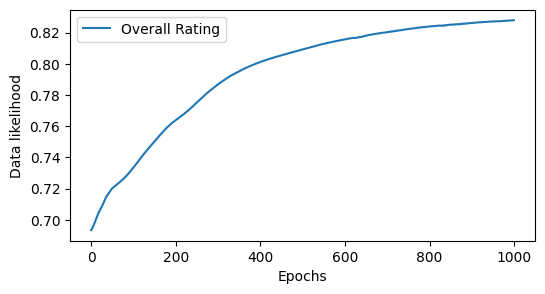

In [42]:
md.show_best(results['rating'], 'Overall Rating', 75)

## 3.3.2 Results from classifying "food_rating"

In [34]:
md.show_topN(results['food_rating']['summary'], top=10)

,Structure,Method,Epochs,Learning Rate,Training Acc,Validation Acc,Test Acc
80,"[5, 10, 5]",adam,2000,0.05,72.429379,53.623188,45.652174
58,"[15, 15]",adam,2000,0.01,87.118644,51.449275,43.478261
31,[10],adam,500,0.01,77.401130,50.724638,47.826087
104,"[10, 15, 10]",scg,2000,-,98.418079,50.000000,44.202899
47,"[15, 15]",sgd,1000,0.05,71.977401,49.275362,44.927536
86,"[10, 15, 10]",sgd,500,0.05,49.265537,49.275362,49.275362
65,"[5, 10, 5]",sgd,500,0.05,49.378531,49.275362,48.550725
96,"[10, 15, 10]",adam,1000,0.005,97.062147,48.550725,44.202899
21,[10],sgd,500,0.005,48.587571,48.550725,45.652174
97,"[10, 15, 10]",adam,1000,0.01,96.384181,48.550725,41.304348


Showing results for configuration # 31
Confusion Matrix:


,0,1,2
0,40.6,25.0,34.4
1,20.5,41.0,38.5
2,16.4,28.4,55.2


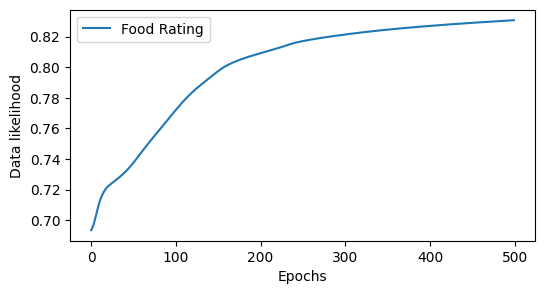

In [50]:
md.show_best(results['food_rating'], 'Food Rating', 31)

## 3.3.3 Results from classifying "service_rating"

In [36]:
md.show_topN(results['service_rating']['summary'], top=10)

,Structure,Method,Epochs,Learning Rate,Training Acc,Validation Acc,Test Acc
92,"[10, 15, 10]",sgd,2000,0.05,76.497175,47.826087,45.652174
47,"[15, 15]",sgd,1000,0.05,70.621469,45.652174,39.130435
33,[10],adam,1000,0.005,78.418079,44.202899,36.956522
34,[10],adam,1000,0.01,75.706215,43.478261,47.101449
88,"[10, 15, 10]",sgd,1000,0.01,46.327684,43.478261,42.753623
41,[10],scg,2000,-,79.435028,43.478261,44.927536
104,"[10, 15, 10]",scg,2000,-,98.418079,42.753623,42.028986
102,"[10, 15, 10]",scg,500,-,95.593220,42.753623,40.579710
101,"[10, 15, 10]",adam,2000,0.05,77.740113,42.753623,44.927536
91,"[10, 15, 10]",sgd,2000,0.01,51.751412,42.753623,44.927536


Showing results for configuration # 34
Confusion Matrix:


,0,1,2
0,37.2,32.6,30.2
1,14.9,55.3,29.8
2,12.5,39.6,47.9


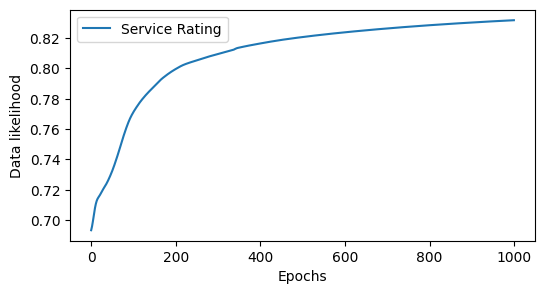

In [56]:
md.show_best(results['service_rating'], 'Service Rating', 34)

## 4. Model B: Graph emdebbings approach

## 4.1 Usage of "easygraph" library: Create graph

In [38]:
import graphing as gr
G = gr.create()

In [39]:
G = gr.add_nodes(G, restaurants)
G = gr.add_nodes(G, users)

130 nodes added.
138 nodes added.


In [40]:
G = gr.add_edges(G, train)

885 edges added.


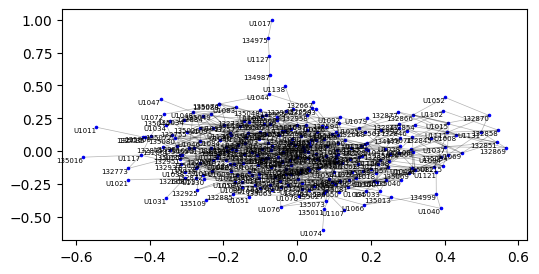

In [41]:
gr.plot_kamada(G)

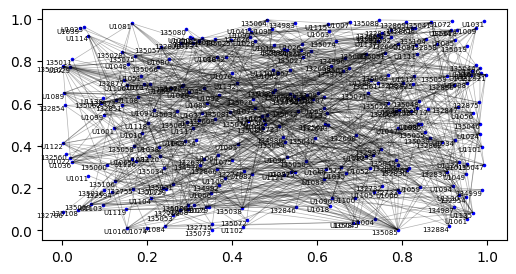

In [42]:
gr.plot_shs(G)

## 4.2 Calculate graph embeddings

In [43]:
DW = gr.embeddingDW(G)

Walk iteration:


100%|██████████| 10/10 [00:00<00:00, 60.52it/s]


In [44]:
Xtrain, Ttrain1, Ttrain2, Ttrain3 = gr.obtain_inputs_outputs(DW[0], train)
Xval,   Tval1,   Tval2,   Tval3 =   gr.obtain_inputs_outputs(DW[0], validation)
Xtest,  Ttest1,  Ttest2,  Ttest3 =  gr.obtain_inputs_outputs(DW[0], test)
print('TRAIN - Inputs size:{}\tOutputs size:{}{}{}'.format(Xtrain.shape,Ttrain1.shape,Ttrain2.shape,Ttrain3.shape))
print('VAL   - Inputs size:{}\tOutputs size:{}{}{}'.format(Xval.shape,Tval1.shape,Tval2.shape,Tval3.shape))
print('TEST  - Inputs size:{}\tOutputs size:{}{}{}'.format(Xtest.shape,Ttest1.shape,Ttest2.shape,Ttest3.shape))

TRAIN - Inputs size:(885, 256)	Outputs size:(885, 1)(885, 1)(885, 1)
VAL   - Inputs size:(138, 256)	Outputs size:(138, 1)(138, 1)(138, 1)
TEST  - Inputs size:(138, 256)	Outputs size:(138, 1)(138, 1)(138, 1)


In [45]:
vectors = [Xtrain, Ttrain1, Ttrain2, Ttrain3,
           Xval,   Tval1,   Tval2,   Tval3,
           Xtest,  Ttest1,  Ttest2,  Ttest3]
import pickle
filename = 'deepwalk_vectors.sav'
pickle.dump(vectors, open(filename, 'wb'))

## 4.3 Train neural network (go to notebook: "C-Model-DW")

In [57]:
filename = 'results_deepwalk.sav'
results = pickle.load(open(filename, 'rb'))

## 4.4 Results analysis and discussion

## 4.4.1 Results from classifying "rating"

In [58]:
import modeling as md
md.show_topN(results['rating']['summary'], top=10)

,Structure,Method,Epochs,Learning Rate,Training Acc,Validation Acc,Test Acc
25,[50],sgd,1000,0.01,77.062147,57.971014,39.855072
16,[],adam,2000,0.01,78.079096,57.971014,46.376812
15,[],adam,2000,0.005,77.966102,57.971014,47.101449
11,[],adam,500,0.05,74.124294,57.971014,44.927536
14,[],adam,1000,0.05,76.158192,57.246377,46.376812
12,[],adam,1000,0.005,74.689266,57.246377,47.101449
17,[],adam,2000,0.05,77.740113,57.246377,49.275362
13,[],adam,1000,0.01,75.932203,57.246377,47.826087
18,[],scg,500,-,79.661017,56.521739,47.101449
9,[],adam,500,0.005,73.672316,56.521739,44.927536


Showing results for configuration # 17
Confusion Matrix:


,0,1,2
0,51.6,29.0,19.4
1,16.7,50.0,33.3
2,17.0,35.8,47.2


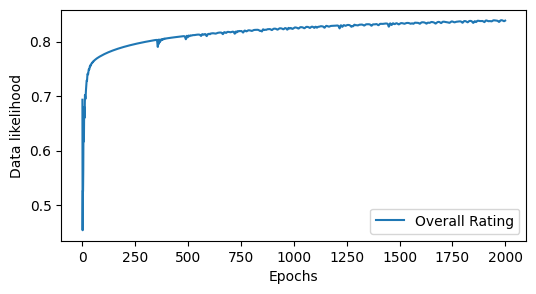

In [69]:
md.show_best(results['rating'], 'Overall Rating', 17)

## 4.4.2 Results from classifying "food_rating"

In [70]:
md.show_topN(results['food_rating']['summary'], top=10)

,Structure,Method,Epochs,Learning Rate,Training Acc,Validation Acc,Test Acc
50,"[100, 100]",sgd,2000,0.05,100.000000,57.971014,56.521739
65,"[200, 150, 100]",sgd,500,0.05,100.000000,57.246377,50.000000
18,[],scg,500,-,77.514124,57.246377,59.420290
61,"[100, 100]",scg,1000,-,100.000000,56.521739,48.550725
33,[50],adam,1000,0.005,100.000000,56.521739,50.724638
71,"[200, 150, 100]",sgd,2000,0.05,100.000000,56.521739,50.000000
73,"[200, 150, 100]",adam,500,0.01,100.000000,56.521739,50.000000
83,"[200, 150, 100]",scg,2000,-,100.000000,55.797101,53.623188
55,"[100, 100]",adam,1000,0.01,100.000000,55.797101,50.000000
29,[50],sgd,2000,0.05,100.000000,55.797101,57.246377


Showing results for configuration # 18
Confusion Matrix:


,0,1,2
0,48.1,33.3,18.5
1,12.2,51.0,36.7
2,9.7,19.4,71.0


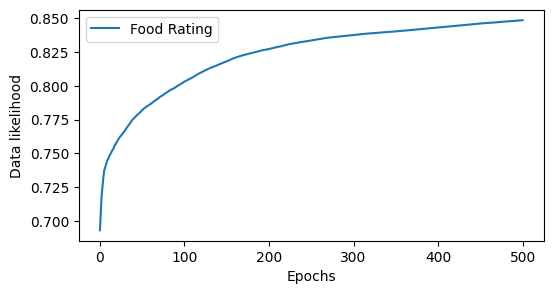

In [73]:
md.show_best(results['food_rating'], 'Food Rating', 18)

## 4.4.3 Results from classifying "service_rating"

In [74]:
md.show_topN(results['service_rating']['summary'], top=10)

,Structure,Method,Epochs,Learning Rate,Training Acc,Validation Acc,Test Acc
39,[50],scg,500,-,100.000000,56.521739,53.623188
29,[50],sgd,2000,0.05,100.000000,55.797101,47.826087
51,"[100, 100]",adam,500,0.005,100.000000,55.072464,47.826087
83,"[200, 150, 100]",scg,2000,-,100.000000,54.347826,39.855072
70,"[200, 150, 100]",sgd,2000,0.01,100.000000,54.347826,49.275362
54,"[100, 100]",adam,1000,0.005,100.000000,54.347826,43.478261
52,"[100, 100]",adam,500,0.01,100.000000,54.347826,43.478261
41,[50],scg,2000,-,100.000000,54.347826,46.376812
25,[50],sgd,1000,0.01,75.706215,53.623188,47.101449
58,"[100, 100]",adam,2000,0.01,100.000000,53.623188,43.478261


Showing results for configuration # 39
Confusion Matrix:


,0,1,2
0,51.4,28.6,20.0
1,20.0,54.5,25.5
2,14.6,31.2,54.2


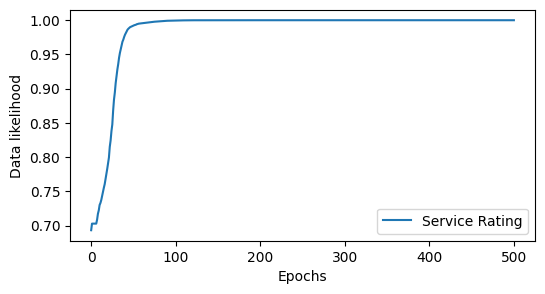

In [75]:
md.show_best(results['service_rating'], 'Service Rating', 39)

## 4.5 Recommend restaurants to users based on embeddings similarity

In [53]:
gr.pick_random(DW[1])

User: U1033
('132951', 0.530897855758667)
('132572', 0.5302718877792358)
('135030', 0.5245858430862427)
('135046', 0.5066505074501038)


## 5. Plot bipartite graph using graphviz library

In [78]:
import plotting as pl
pl.plot_bipartite(restaurants, users, ratings)

In [79]:
pl.plot_graph(ratings, 'full')

In [80]:
pl.plot_graph(train, 'train')

In [81]:
pl.plot_graph(validation, 'validation')

In [82]:
pl.plot_graph(test, 'test')

## 6. Plot Project dependencies between files

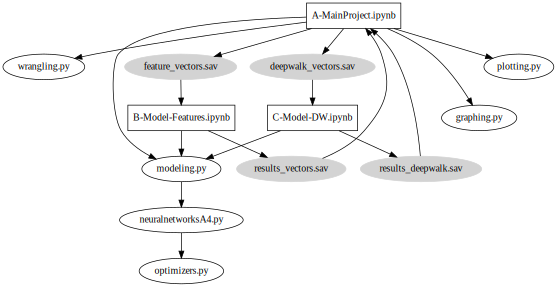

In [83]:
pl.plot_project()